## ⚙️ Import Libraries
Import the libraries needed for preprocessing data.

In [ ]:
seed = 42
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
import imagehash

from imblearn.over_sampling import SMOTE

np.random.seed(seed)
tf.random.set_seed(seed)

## ⏳ Load the Data

In [2]:
# Import images and labels
data = np.load('../Training_set/training_set.npz')
images = data['images']
labels = data['labels']

# Show the shape of the images and labels
print("Images: ", images.shape)
print("Labels: ", labels.shape)

print(labels)

Images:  (13759, 96, 96, 3)
Labels:  (13759, 1)
[[7]
 [3]
 [6]
 ...
 [5]
 [5]
 [5]]


Display some images, to understand a bit the content of the dataset.

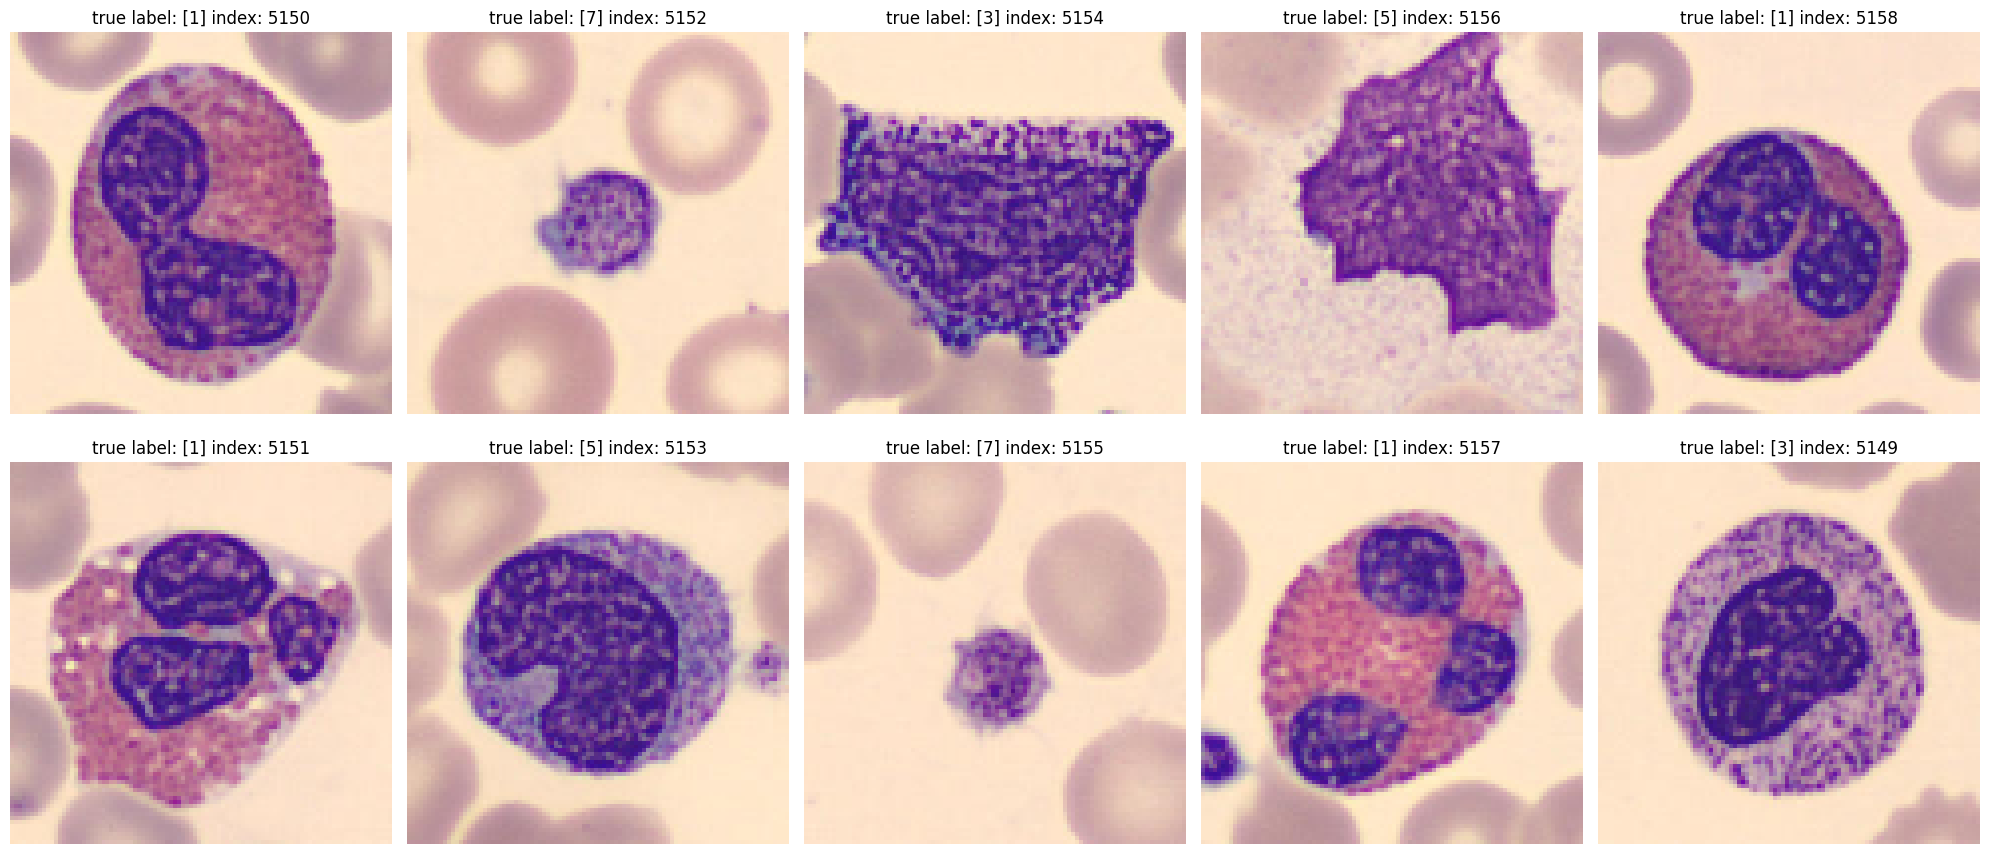

In [3]:
# Number of images to display
size = labels.size
num_img = 10

# Create a random index to display every time a different set of images
random_index = np.random.rand()
random_index = int(random_index * (size - num_img))

# Create subplots for displaying items
fig, axes = plt.subplots(2, num_img//2, figsize=(20, 9))
for i in range(random_index, random_index + num_img):
    title = 'true label: ' + str(labels[i]) + ' index: ' + str(i)
    ax = axes[i%2, i%num_img//2]
    ax.set_title(title)
    ax.imshow(np.clip(images[i], 0, 255))  # Display clipped item images
    ax.axis('off')
plt.tight_layout()
plt.show()

We detected that, from index 11959 to index 13558, all the images have Shrek as background, and from index 13559 on all the images have Rick Astley as background, and they are all the same. Thus, in order to improve the quality of the dataset, we remove all the images from index 11959 on.

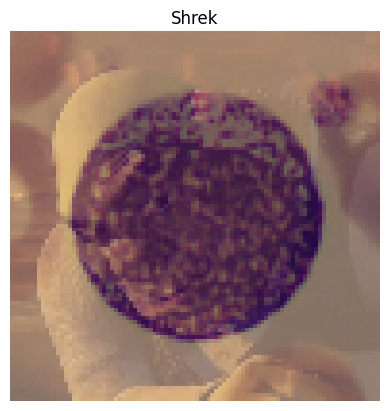

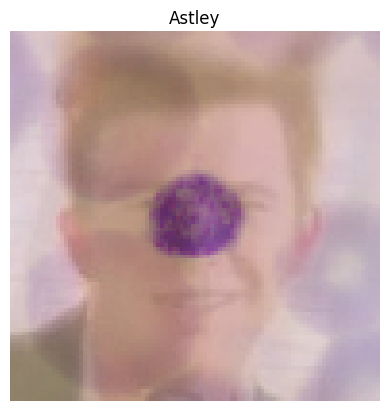

In [4]:
shrek_index = 11959
astley_index = 13559

# Display the Shrek image
plt.imshow(images[shrek_index])
plt.title('Shrek')
plt.axis('off')
plt.show()

# Display the Astley image
plt.imshow(images[astley_index])
plt.title('Astley')
plt.axis('off')
plt.show()

Remove all the images from index 11959 included

In [5]:
# Keep only the images and the corresponding before the specified index
images = images[:shrek_index]
labels = labels[:shrek_index]

# Print the shape of the new dataset
print("Shape of 'images': ", images.shape)
print("Shape of 'labels': ", labels.shape)

Shape of 'images':  (11959, 96, 96, 3)
Shape of 'labels':  (11959, 1)


### Check for duplicates


In [6]:
def are_same_image (image1, image2):
    if image1.shape != (96, 96, 3) or image2.shape != (96, 96, 3):
        print("ERROR: The images are not the same size.")
        return False
    return np.array_equal(image1, image2)

In [7]:
# Store the indices of, respectively, unique images and duplicated images
unique_images_indices = []
duplicated_images_indices = []

for i in range(len(images)):
    is_image_unique = True

    j = 0
    while j < i and is_image_unique:
        if are_same_image(images[i], images[j]) and labels[i] == labels[j]:
            print(f"Image at index {i} already exists at index {j} with same label {labels[i]}.")
            is_image_unique = False
        j += 1

    if is_image_unique:
        unique_images_indices.append(i)
    else:
        duplicated_images_indices.append(i)

Image at index 3440 already exists at index 1074 with same label [1].
Image at index 4761 already exists at index 120 with same label [3].
Image at index 9084 already exists at index 8117 with same label [5].
Image at index 10734 already exists at index 7953 with same label [1].
Image at index 11026 already exists at index 810 with same label [0].
Image at index 11566 already exists at index 3052 with same label [0].
Image at index 11575 already exists at index 3328 with same label [3].
Image at index 11856 already exists at index 5466 with same label [3].


In [8]:
# Remove the duplicated images
unique_images = []
unique_labels = []

print(duplicated_images_indices)

for i in range(len(unique_images_indices)):
    unique_images.append(images[unique_images_indices[i]])
    unique_labels.append(labels[unique_images_indices[i]])

if len(unique_images) != len(unique_labels):
    print("ERROR: The number of images and labels is not the same.")

# Convert them to NumPy array
unique_images = np.array(unique_images)
unique_labels = np.array(unique_labels) 

print("Unique images: ", len(unique_images))
print("Unique labels: ", unique_labels)

# Save the balanced dataset
np.savez_compressed('clean_dataset', images=unique_images, labels=unique_labels)

[3440, 4761, 9084, 10734, 11026, 11566, 11575, 11856]
Unique images:  11951
Unique labels:  [[7]
 [3]
 [6]
 ...
 [1]
 [6]
 [4]]


Rebalancing classes: SMOTE

In [9]:
# Import images and labels
data = np.load('clean_dataset.npz')
images = data['images']
labels = data['labels']

# Show the shape of the images and labels
print("Images: ", images.shape)
print("Labels: ", labels.shape)

print(labels)

Images:  (11951, 96, 96, 3)
Labels:  (11951, 1)
[[7]
 [3]
 [6]
 ...
 [1]
 [6]
 [4]]


In [10]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
sm = SMOTE(sampling_strategy='auto', random_state=seed)

# Flatten the images
images_flat = images.reshape(images.shape[0], -1)

# Use th SMOTE object to oversample the dataset
oversampled_images_flat, oversampled_labels = sm.fit_resample(images_flat, labels)

# Reshape the images back to their original shape
original_shape = (96, 96, 3)
oversampled_images = oversampled_images_flat.reshape(-1, *original_shape)

# Check the number of occurrences of each label
unique, counts = np.unique(oversampled_labels, return_counts=True)

print('Number of occurrences of each label: ')
for i in range(unique.size):
    print(f'Label {unique[i]}: {counts[i]}')

Number of occurrences of each label: 
Label 0: 2330
Label 1: 2330
Label 2: 2330
Label 3: 2330
Label 4: 2330
Label 5: 2330
Label 6: 2330
Label 7: 2330


In [11]:
# Save the balanced dataset
np.savez_compressed('balanced_dataset', images=oversampled_images, labels=oversampled_labels)